





# DBSCAN


https://scikit-learn.org/stable/modules/clustering.html#clustering


https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html


![](https://d.pr/i/Re9qoB+)


![](https://d.pr/i/T3srVy+)


**DBScan(Density-Based Spatial Clustering of Applications with Noise)** 은 밀도 기반의 군집 알고리즘으로, 데이터의 밀도(주변에 있는 포인트의 수)를 기반으로 클러스터를 형성한다. 이는 복잡한 형태의 데이터에도 유연하게 대처할 수 있고, 노이즈 포인트를 처리하는 데도 강점을 가진다.


**밀도를 파악하고, 일정밀도 이상을 구성한다면 이에 따라 움직이면서 클러스터를 구성해간다.**


**적용사례**
- **지리 데이터 분석**: 지역별 사고 다발 지역 탐지
- **이상 감지**: 금융 거래에서의 사기 탐지
- **이미지 처리**: 이미지 세그멘테이션


**주요 매개변수**
- **Epsilon (eps)** $\epsilon$: 포인트 간의 최대 거리. 같은 클러스터로 묶이기 위해서는 두 포인트 사이의 거리가 ε 이하여야 한다.
- **Minimum Points (min_pts)** 클러스터를 형성하기 위해 필요한 최소 포인트 수.


![](https://d.pr/i/tiIr6K+)


eps 거리와 min_pts를 기준으로 클러스터가 형성되는 과정. 핵심 포인트(Core Point), 경계 포인트(Border Point), 노이즈 포인트(Noise Point)의 구분을 시각화하여 나타낸다.




1. **핵심 포인트(Core Point)**: 포인트 P의 ε 반경 내에 있는 포인트의 수가 MinPts 이상이어야 한다.


   - **핵심 포인트 조건**: $N_\varepsilon (P)$는 P를 중심으로 ε 거리 내의 이웃 포인트의 집합을 의미한다.


        $
        |N_\varepsilon (P)| \geq \text{MinPts}
        $


2. **경계 포인트(Border Point)**: P의 ε 거리 내에 핵심 포인트가 존재하지만, P 자신은 핵심 포인트가 아닌 경우.
3. **노이즈 포인트(Noise Point)**: P의 ε 거리 내에 핵심 포인트가 존재하지 않는 경우.


**DBScan 알고리즘의 주요 단계**
1. **모든 데이터 포인트에 대해 방문 여부를 체크**.
2. 아직 방문하지 않은 포인트에 대해, 해당 포인트가 핵심 포인트인지 확인.
3. 핵심 포인트일 경우, 해당 포인트와 연결된 모든 포인트를 찾고, 이를 클러스터로 묶음.
4. 핵심 포인트가 아닐 경우, 경계 포인트 또는 노이즈로 분류.




**장점**
- **비구형 클러스터 탐지**: 비구형 및 불균일한 클러스터 구조를 효과적으로 식별합니다.
- **잡음 데이터 처리**: 잡음 데이터나 이상치를 효과적으로 분리합니다.
- **비지도 학습**: 클러스터의 개수를 사전에 알 필요가 없습니다. 이는 하이퍼 파라미터가 아니라 자동으로 처리됩니다.


**단점**
- 데이터 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 군집화 성능이 떨어집니다.
- 특성의 개수가 많으면 군집화 성능이 떨어집니다.
- **매개변수 민감성**: eps와 minPts 값 선택에 민감하며, 적절하지 않으면 성능이 떨어질 수 있습니다.
- **고차원 데이터**: 고차원 데이터에서는 밀도 불균형 문제가 발생할 수 있습니다.
- **밀도 차이 문제**: 클러스터 내 데이터 밀도가 크게 차이날 경우 부정확한 클러스터링이 발생할 수 있습니다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Moon 데이터

(300, 2)


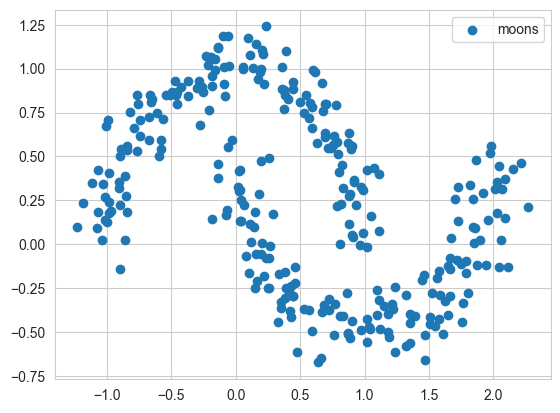

In [30]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
print(X.shape)

plt.scatter(X[:, 0], X[:, 1], label='moons')
plt.legend()
plt.show()

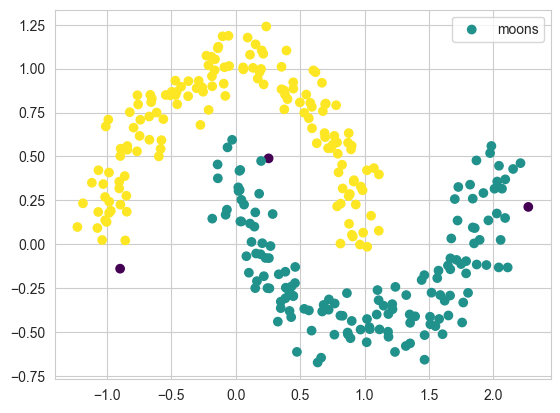

In [38]:
# DBSCAN 적용
from sklearn.cluster import DBSCAN

# - eps(반경) : 작을수록 노이즈포인트 증가
# - min_samples(최소포인트수) : 클수록 노이즈포인트 중가
dbscan = DBSCAN(eps=0.2, min_samples=8)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='moons')
plt.legend()
plt.show()

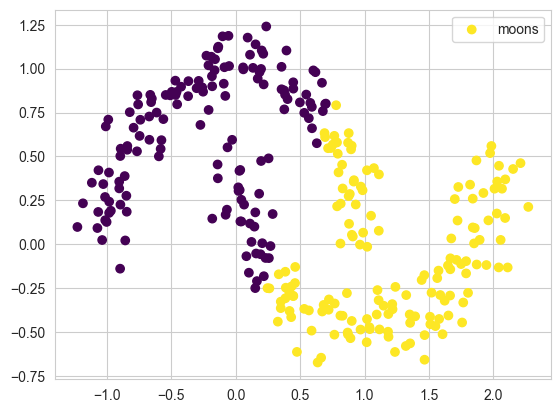

In [21]:
# KMeans로 클러스터링 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label='moons')
plt.legend()
plt.show()

## Iris 데이터

In [22]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)

dbscan = DBSCAN(eps=0.5, min_samples=8)
labels = dbscan.fit_predict(X)

X['target'] = y
X['cluster'] = labels

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,-1


(150, 2)


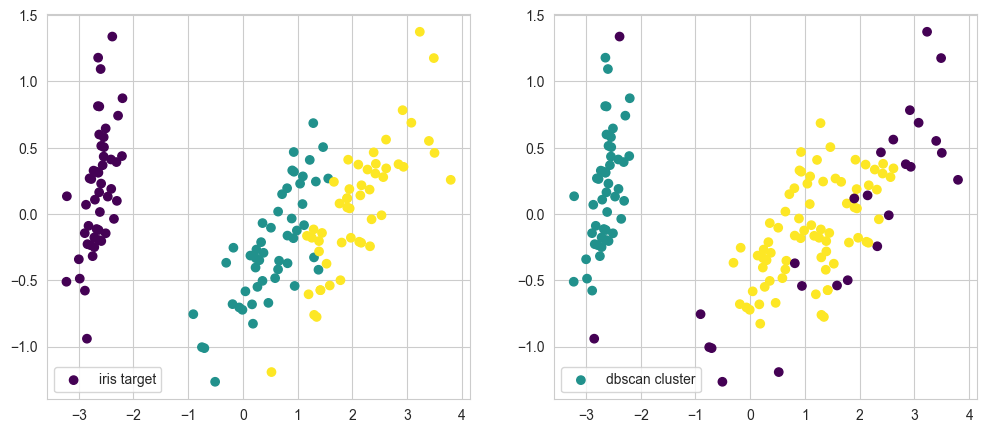

In [26]:
# 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, :4])
print(X_pca.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='iris target')
ax1.legend()

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=X['cluster'], cmap='viridis', label='dbscan cluster')
ax2.legend()

plt.show()